In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-mm-mlo.csv
/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-annmean-gl.csv
/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/combined_annual_co2_data.csv
/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-gr-mlo.csv
/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-mm-gl.csv
/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-annmean-mlo.csv
/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-gr-gl.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1=pd.read_csv("/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-annmean-gl.csv")
df2=pd.read_csv("/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-annmean-mlo.csv")
df3=pd.read_csv("/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-gr-gl.csv")
df4=pd.read_csv("/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-gr-mlo.csv")
df5=pd.read_csv("/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-mm-gl.csv")
df6=pd.read_csv("/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-mm-mlo.csv")

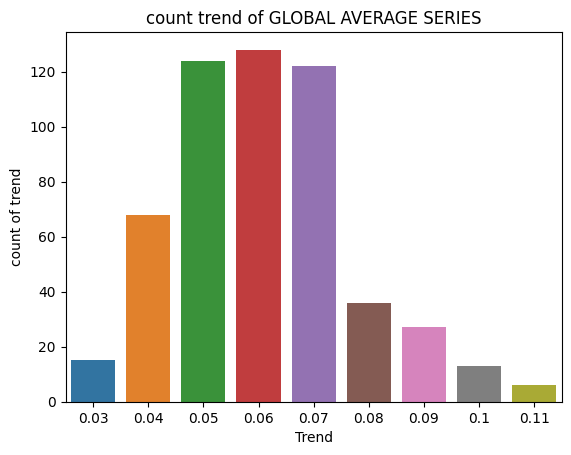

In [4]:
trend=df5.groupby("Trend")["Trend"].count()
sns.barplot(x=trend.index,y=trend.values)
plt.title("count trend of GLOBAL AVERAGE SERIES")
plt.xlabel("Trend")
plt.ylabel("count of trend")
plt.show()

**The overall trend or pattern of the data on atmospheric CO2 emissions over time is shown in the Trend Column of the datasheet. The trend column's objective is to show whether CO2 emissions are rising, falling, or staying the same. The most common trend values in this case are0.05,0.06, or 0.07. The trend column is positive.**

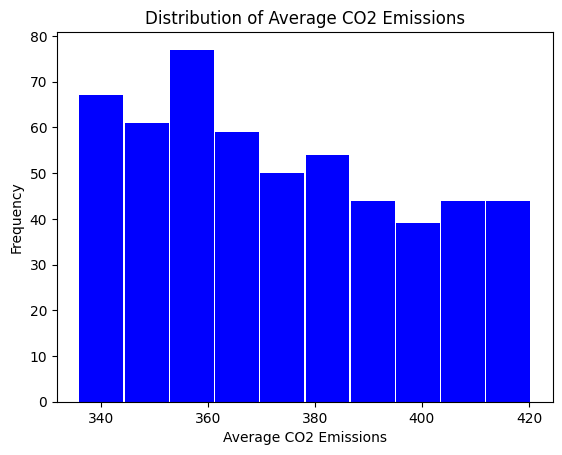

In [5]:
plt.hist(df5["Average"],rwidth=0.97,color="b")
plt.title("Distribution of Average CO2 Emissions")
plt.xlabel("Average CO2 Emissions")
plt.ylabel("Frequency")
plt.show()

**As we progress toward greater average emissions, the frequency of emissions gradually decreases, with the most frequent emission value being around 340, according to the histogram showing average CO2 emissions. A noteworthy deviation is a small rise in frequency in the vicinity of an average emission value of 400. With a few outliers at higher levels, the distribution as a whole indicates that most data points fall within the lower range of typical CO2 emissions. This is how the Global Average Series is determined.**

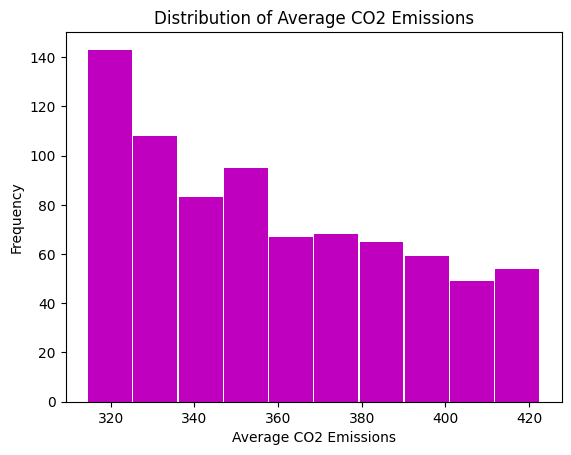

In [6]:
plt.hist(df6["Average"],rwidth=0.97,color="m")
plt.title("Distribution of Average CO2 Emissions")
plt.xlabel("Average CO2 Emissions")
plt.ylabel("Frequency")
plt.show()

**The Mauna Loa dataset series' average CO2 emissions histogram shows that the most common emission amount happens around 320 (the precise unit is not specified). Increasing average emissions cause the frequency to progressively drop. It's interesting to note that frequency increases slightly with an average emission value of 400. With a few outliers at higher levels, the distribution as a whole indicates that most data points fall within the lower range of typical CO2 emissions.**

In [7]:
df_merged1=pd.merge(df1,df2,on="Year")
df_merged2=pd.merge(df3,df4,on="Year")
df_merged2.head()

,Year,Annual Increase_x,Uncertainty_x,Annual Increase_y,Uncertainty_y
0,1959,0.96,0.31,0.94,0.11
1,1960,0.71,0.27,0.50,0.11
2,1961,0.78,0.27,0.96,0.11
3,1962,0.56,0.27,0.64,0.11
4,1963,0.57,0.28,0.71,0.11


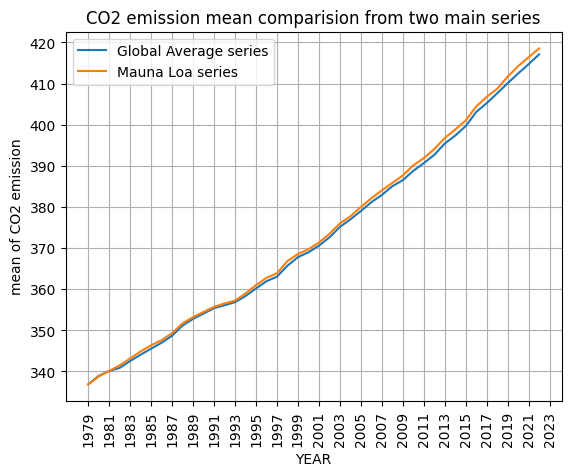

In [8]:
plt.plot(df_merged1["Year"],df_merged1["Mean_x"],label="Global Average series")
plt.plot(df_merged1["Year"],df_merged1["Mean_y"],label="Mauna Loa series")
plt.legend()
plt.xticks(range(1979,2024,2),rotation=90)
plt.title("CO2 emission mean comparision from two main series")
plt.xlabel("YEAR")
plt.ylabel("mean of CO2 emission")
plt.grid()
plt.show()

**The Mauna Loa series shows a distinct rising trend throughout time, as shown by the dataset and graph. We can assume that the measured parameters refer to some metric related to climate or atmospheric composition even though the precise units or context are not labeled. From 1979 to 2023, the Mauna Loa series has increasing values from left to right, indicating an increase in the related parameter. Although the Global Average series is also presented, it is not as prominent as the unique pattern that the Mauna Loa data exhibits. All things considered, this increasing trajectory emphasizes how crucial it is to keep an eye on and comprehend variations in atmospheric conditions.**

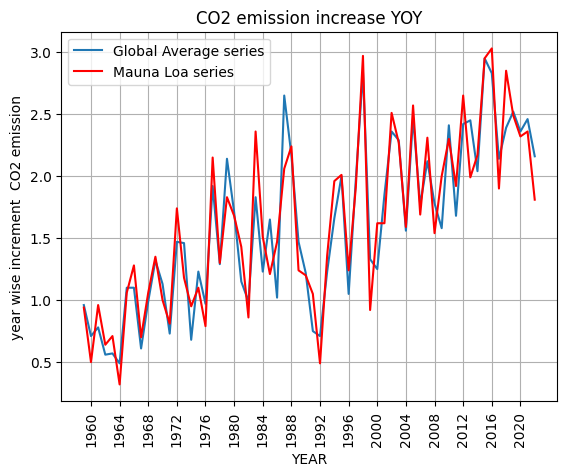

In [9]:
plt.plot(df_merged2["Year"],df_merged2["Annual Increase_x"],label="Global Average series")
plt.plot(df_merged2["Year"],df_merged2["Annual Increase_y"],color="r",label="Mauna Loa series")
plt.xticks(range(1960,2024,4),rotation=90)
plt.title("CO2 emission increase YOY")
plt.xlabel("YEAR")
plt.ylabel("year wise increment  CO2 emission")
plt.legend()
plt.grid()
plt.show()

**The dataset and graph show that the Mauna Loa series has been trending rising over time. The measured parameters are not labeled with precise units or context, but we can assume that they correspond to some metric related to air composition or climate. As we proceed from left to right (from 1979 to 2023), the Mauna Loa series exhibits increasing values, indicating an increase in the related parameter. Although it is presented as well, the Global Average series is less prominent than the clear trend that the Mauna Loa data exhibits. This upward trend, taken as a whole, emphasizes how critical it is to track and comprehend variations in atmospheric conditions.**

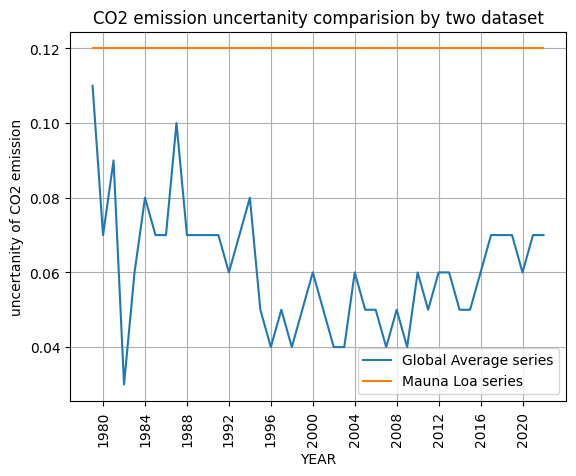

In [10]:
plt.plot(df_merged1["Year"],df_merged1["Uncertainty_x"],label="Global Average series")
plt.plot(df_merged1["Year"],df_merged1["Uncertainty_y"],label="Mauna Loa series")
plt.legend()
plt.xticks(range(1980,2024,4),rotation=90)
plt.title("CO2 emission uncertanity comparision by two dataset")
plt.xlabel("YEAR")
plt.ylabel("uncertanity of CO2 emission")
plt.grid()
plt.show()

**The "Global Average series" and the "Mauna Loa series" are the two distinct time series that the dataset represented in the graph seems to represent. The Mauna Loa series indicates a more steady upward trend in uncertainty than the Global Average series, which displays notable variations.**

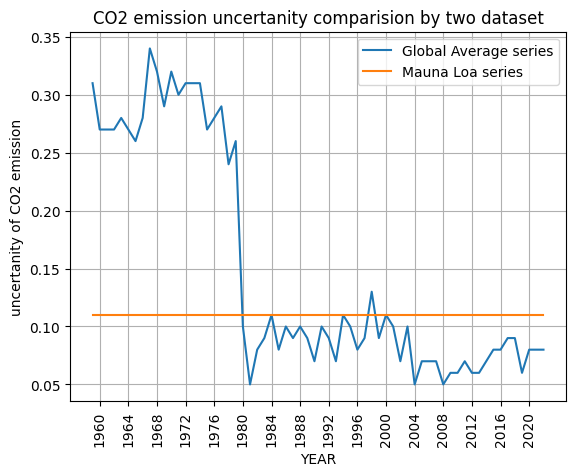

In [11]:
plt.plot(df_merged2["Year"],df_merged2["Uncertainty_x"],label="Global Average series")
plt.plot(df_merged2["Year"],df_merged2["Uncertainty_y"],label="Mauna Loa series")
plt.xticks(range(1960,2024,4),rotation=90)
plt.legend()
plt.title("CO2 emission uncertanity comparision by two dataset")
plt.xlabel("YEAR")
plt.ylabel("uncertanity of CO2 emission")
plt.grid()
plt.show()

**The dataset that the graph displays seems to depict the "Global Average series" and the "Mauna Loa series," two distinct time series. The Mauna Loa dataset displays a more steady increasing trend than the Global Average series, which fluctuates significantly.**

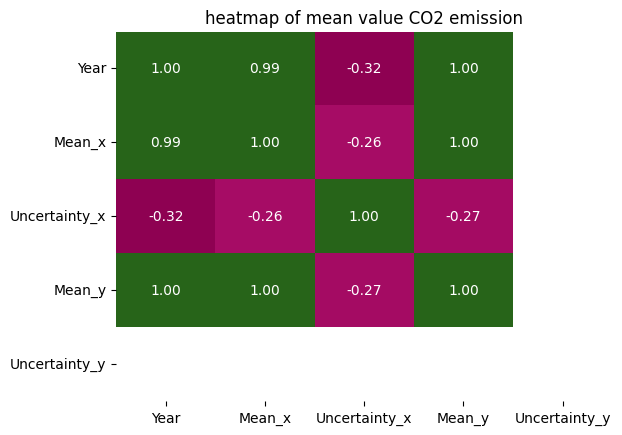

In [12]:
sns.heatmap(df_merged1.corr(), annot=True, cmap='PiYG', fmt=".2f", cbar=False)
plt.title("heatmap of mean value CO2 emission")
plt.show()

**The dataset that is represented in the graph seems to depict the "Global Average series" and the "Mauna Loa series," two distinct time series. Whereas the Mauna Loa data displays a more steady increasing trend, the Global Average series displays notable oscillations.**

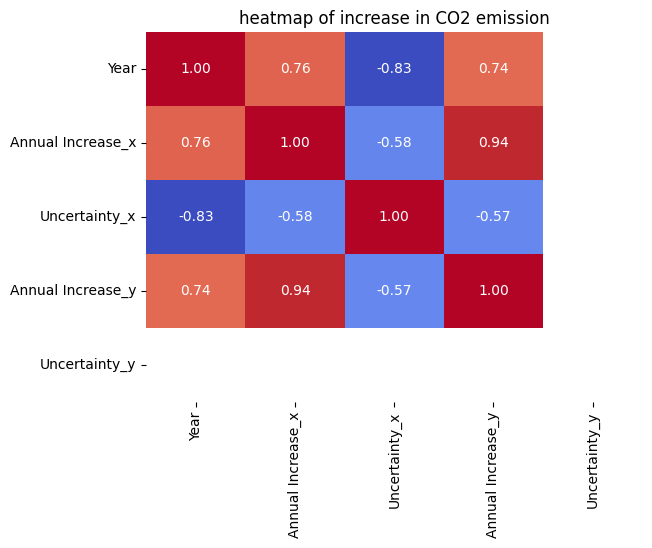

In [13]:
sns.heatmap(df_merged2.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("heatmap of increase in CO2 emission")
plt.show()

**Strong Positive Correlations:** Every variable has perfect correlations (almost 1.00) with itself along the diagonal extending from top left to bottom right. Year and both Annual Increases have a very strong positive association (0.76 with X and 0.74 with Y). X and Y, the two annual increases, similarly show a strong positive association (0.94).

**Negative Correlations:** Year (-0.83) and Annual Increase X (-0.58) have negative correlations with Uncertainty X. Similarly, Year (-0.27) and Annual Increase Y (-0.26) have negative relationships with Uncertainty Y. All things considered, this heatmap sheds light on the connections between these variables, emphasizing their interdependencies and possible effects on the parameter being assessed.